<h1>This notebook contains <b>Time Series Analysis</b> on the Online Retail Dataset

Rubrics CS3 (14 marks): Time Series Analysis<br>
Pre-processing (2) <br>
Visualization (2)<br>
Stationarity checks (1)<br>
Identify patterns (3)<br>
ARIMA (5)<br>
Prediction (1)<br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/PravinSabariBala/Business-Analysis-on-UCI-sales-dataset/main/Final_dataset.csv')

In [3]:
df.dropna(inplace=True)

In [4]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-01-12 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-01-12 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-01-12 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-01-12 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-01-12 07:45:00,1.25,13085.0,United Kingdom


In [5]:
if 'Customer ID' in df.columns:
    df.rename(columns={'Customer ID':'Customer_ID'},inplace=True) 

In [6]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer_ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-01-12 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-01-12 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-01-12 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-01-12 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-01-12 07:45:00,1.25,13085.0,United Kingdom


In [7]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceDate'] = df['InvoiceDate'].dt.date

In [8]:
df.dtypes

Invoice         object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
Price          float64
Customer_ID    float64
Country         object
dtype: object

In [9]:
sales = df.groupby('InvoiceDate')['Price'].sum()

In [10]:
daily_sales_data = pd.DataFrame(sales)

In [11]:
daily_sales_data.reset_index()

,InvoiceDate,Price
0,2009-01-12,7541.01
1,2009-02-12,6982.95
2,2009-03-12,9214.00
3,2009-04-12,5573.63
4,2009-05-12,1443.26
...,...,...
599,2011-12-06,3033.94
600,2011-12-07,2228.50
601,2011-12-08,2078.51
602,2011-12-09,4277.26


In [12]:
daily_sales_data.index = pd.to_datetime(daily_sales_data.index)

In [13]:
daily_sales_data.head()

,Price
InvoiceDate,
2009-01-12,7541.01
2009-02-12,6982.95
2009-03-12,9214.00
2009-04-12,5573.63
2009-05-12,1443.26


<Figure size 1000x600 with 0 Axes>

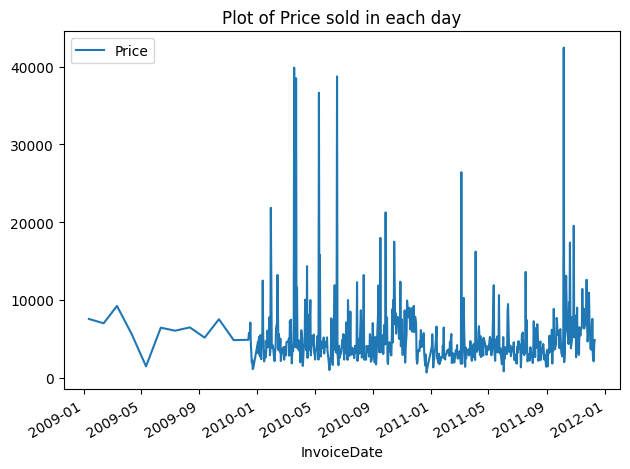

In [14]:
plt.figure(figsize=(10,6))
daily_sales_data.plot()
plt.title("Plot of Price sold in each day")
plt.tight_layout()

In [15]:
import numpy as np
from scipy import stats

def remove_outliers(df, column):
    # Calculate the Z-score for the specified column
    z_scores = np.abs(stats.zscore(df[column]))

    # Define a threshold value to identify outliers
    threshold = 3

    # Find the indices of outliers based on the threshold
    outlier_indices = np.where(z_scores > threshold)

    # Remove the outliers from the dataframe
    cleaned_df = df.drop(outlier_indices[0])

    return cleaned_df

In [16]:
cleaned_df = remove_outliers(daily_sales_data.reset_index(),'Price')

In [17]:
cleaned_df.set_index('InvoiceDate',inplace=True)

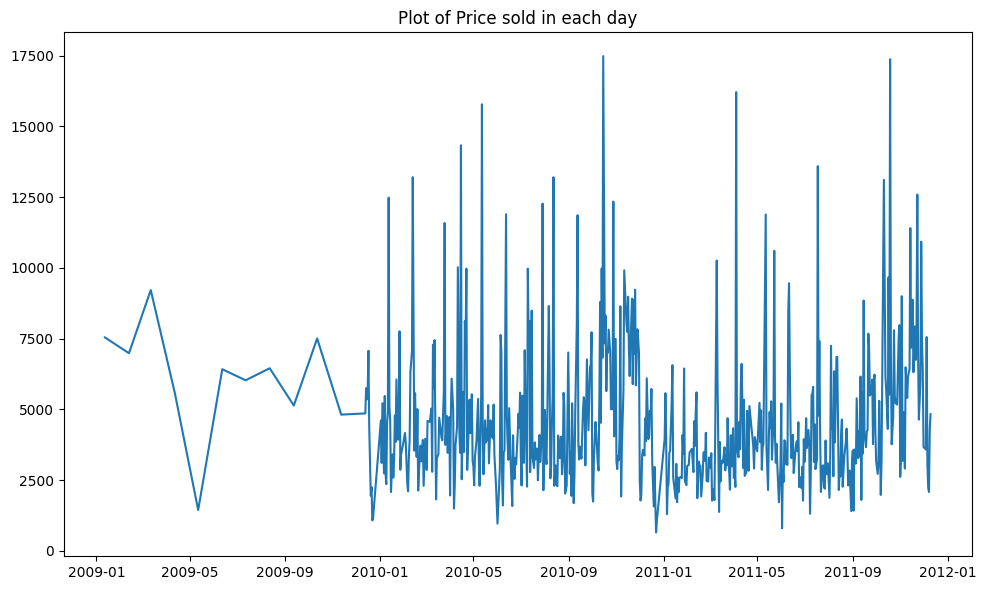

In [18]:
plt.figure(figsize=(10,6))
plt.plot(cleaned_df)
plt.title("Plot of Price sold in each day")
plt.tight_layout()

In [19]:
X_week=cleaned_df.resample('w').mean()
X_month=cleaned_df.resample('M').mean()

In [20]:
X_month['Year']=[d.year for d in X_month.index]
X_month['MonthNum']=[d.month for d in X_month.index]
X_month['Month']=[d.strftime('%b') for d in X_month.index]

In [21]:
X_month.head()

,Price,Year,MonthNum,Month
InvoiceDate,,,,
2009-01-31,7541.01,2009,1,Jan
2009-02-28,6982.95,2009,2,Feb
2009-03-31,9214.00,2009,3,Mar
2009-04-30,5573.63,2009,4,Apr
2009-05-31,1443.26,2009,5,May


In [22]:
rand_color=['tab:orange','tab:green','tab:red']
years=X_month['Year'].unique()

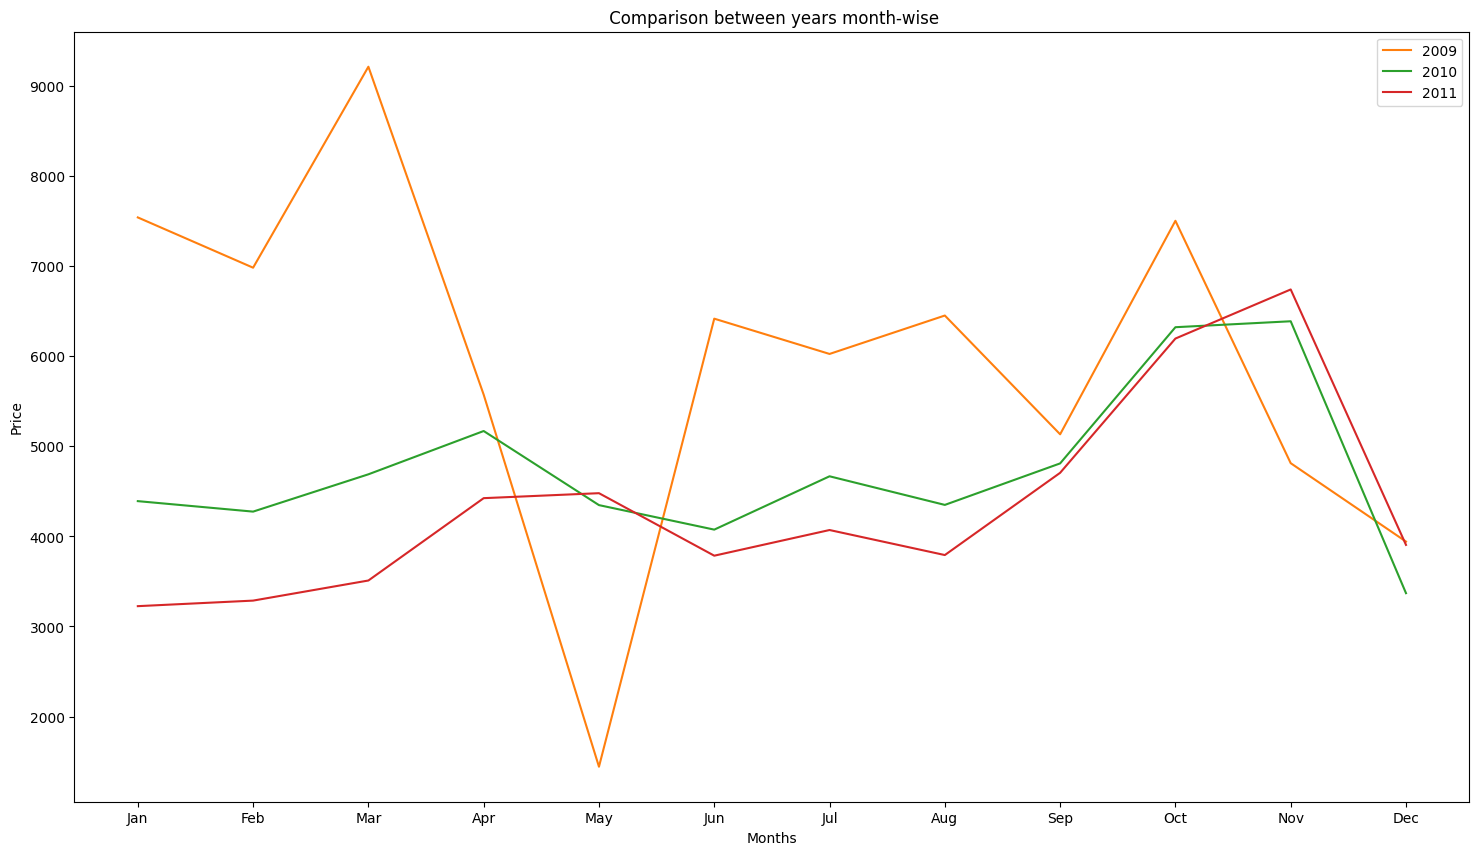

In [23]:
plt.figure(figsize=(18,10))
for i in range(len(years)):
    plt.plot('Month','Price',data=X_month.loc[X_month.Year==years[i],:],color=rand_color[i],label=years[i])
    plt.xlabel("Months")
    plt.ylabel("Price")
    plt.title(" Comparison between years month-wise")
plt.legend()

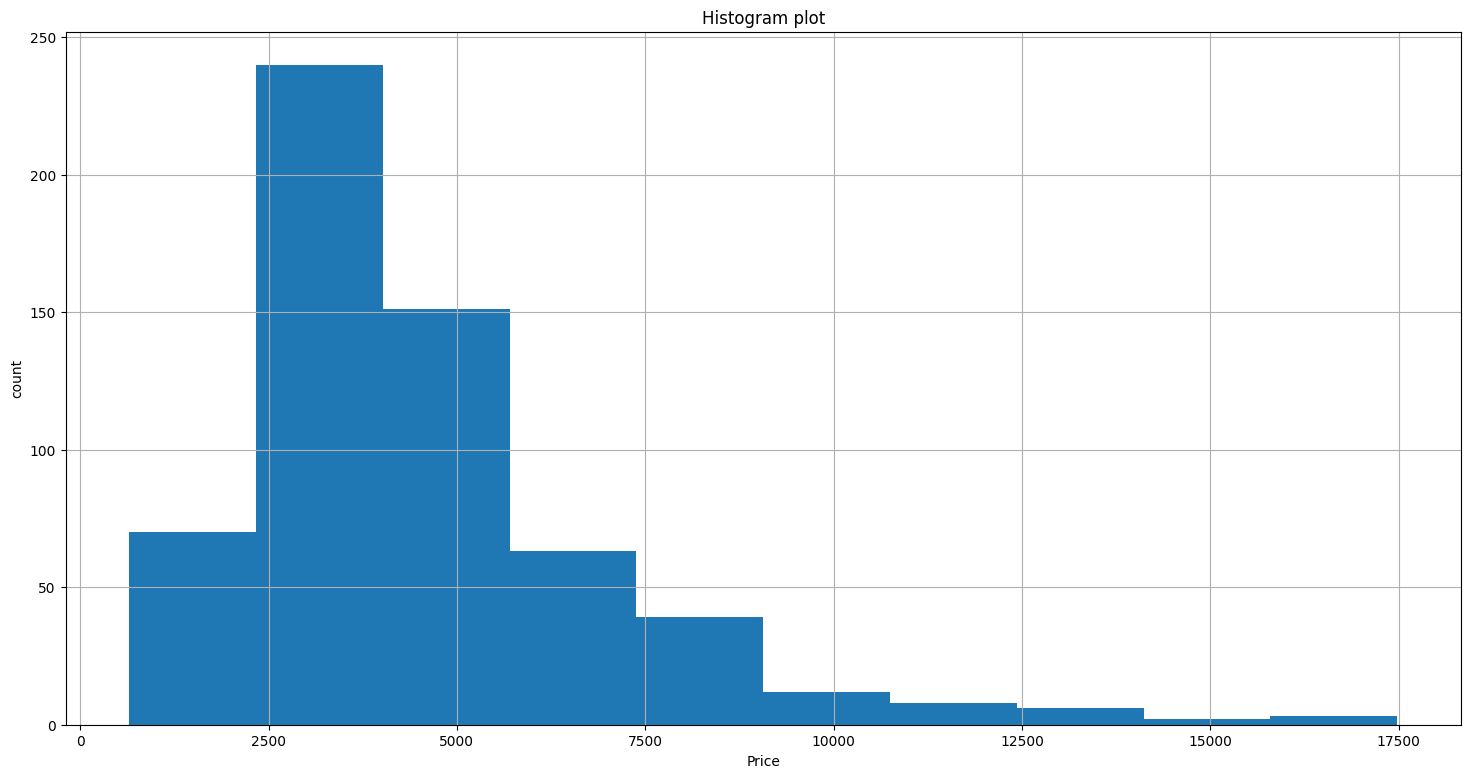

In [24]:
plt.figure(figsize=(18,9))
cleaned_df['Price'].hist()
plt.xlabel("Price")
plt.ylabel("count")
plt.title("Histogram plot")
plt.show()

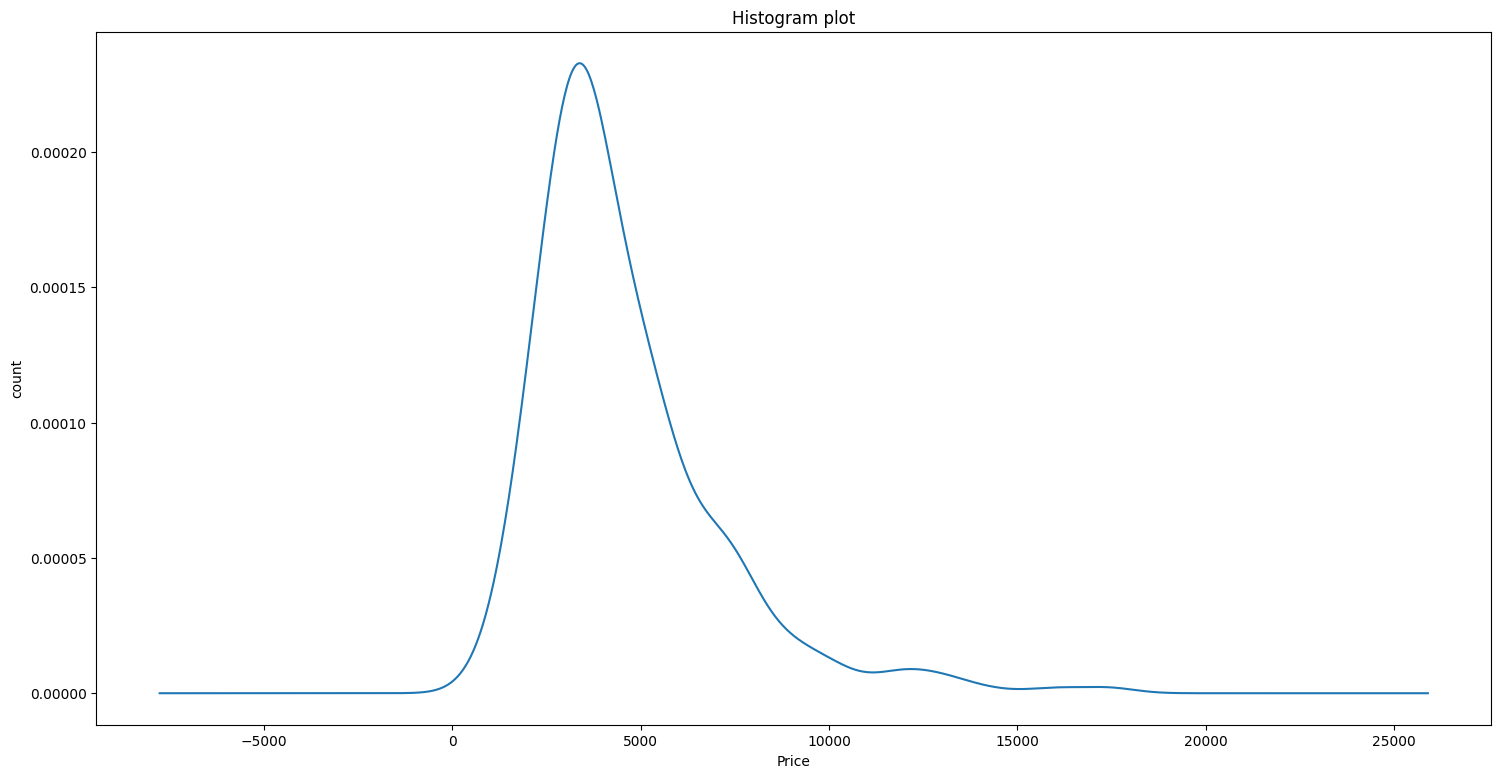

In [25]:
plt.figure(figsize=(18,9))
cleaned_df['Price'].plot(kind='kde')
plt.xlabel("Price")
plt.ylabel("count")
plt.title("Histogram plot")
plt.show()

In [26]:
X = cleaned_df.copy()

In [27]:
X['Year']=[d.year for d in X.index]
X['MonthNum']=[d.month for d in X.index]
X['Month']=[d.strftime('%b') for d in X.index]
X['Day']=[d.day for d in X.index]
X['DayName']=[d.strftime('%a') for d in X.index]

In [28]:
X

,Price,Year,MonthNum,Month,Day,DayName
InvoiceDate,,,,,,
2009-01-12,7541.01,2009,1,Jan,12,Mon
2009-02-12,6982.95,2009,2,Feb,12,Thu
2009-03-12,9214.00,2009,3,Mar,12,Thu
2009-04-12,5573.63,2009,4,Apr,12,Sun
2009-05-12,1443.26,2009,5,May,12,Tue
...,...,...,...,...,...,...
2011-12-06,3033.94,2011,12,Dec,6,Tue
2011-12-07,2228.50,2011,12,Dec,7,Wed
2011-12-08,2078.51,2011,12,Dec,8,Thu


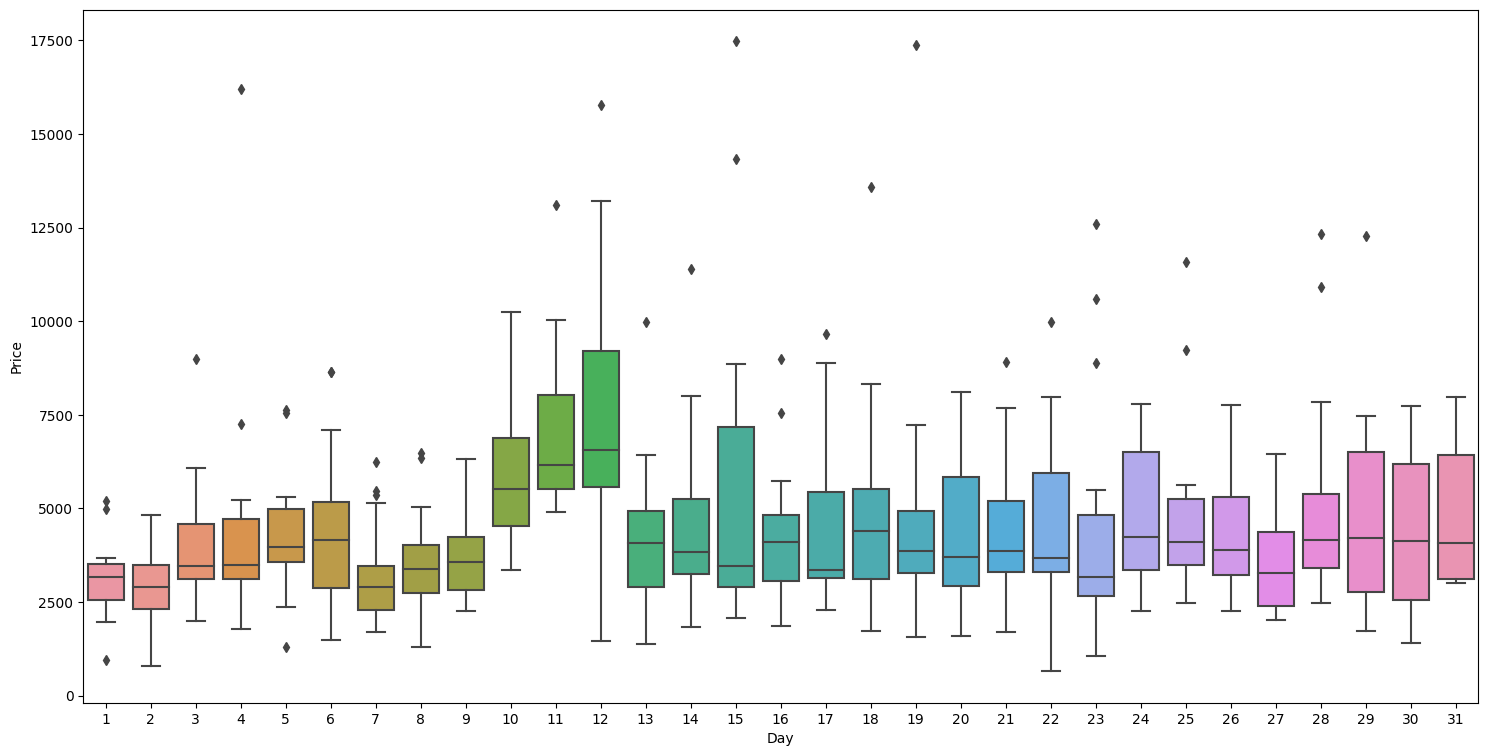

In [29]:
plt.figure(figsize=(18,9))
sns.boxplot(x='Day',y='Price',data=X)
plt.show()

<Axes: xlabel='DayName', ylabel='Price'>

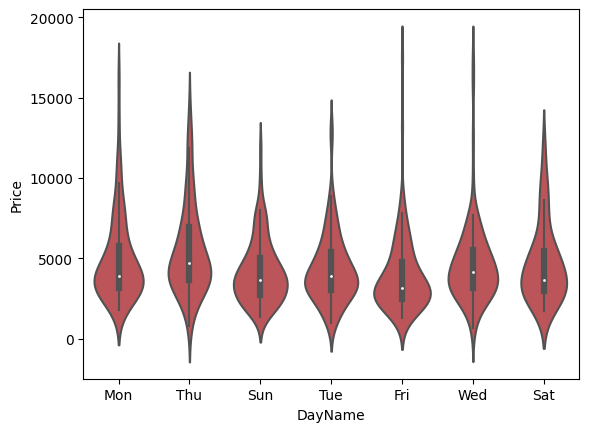

In [30]:
 sns.violinplot(data=X, x='DayName', y='Price', color='#cc444b')

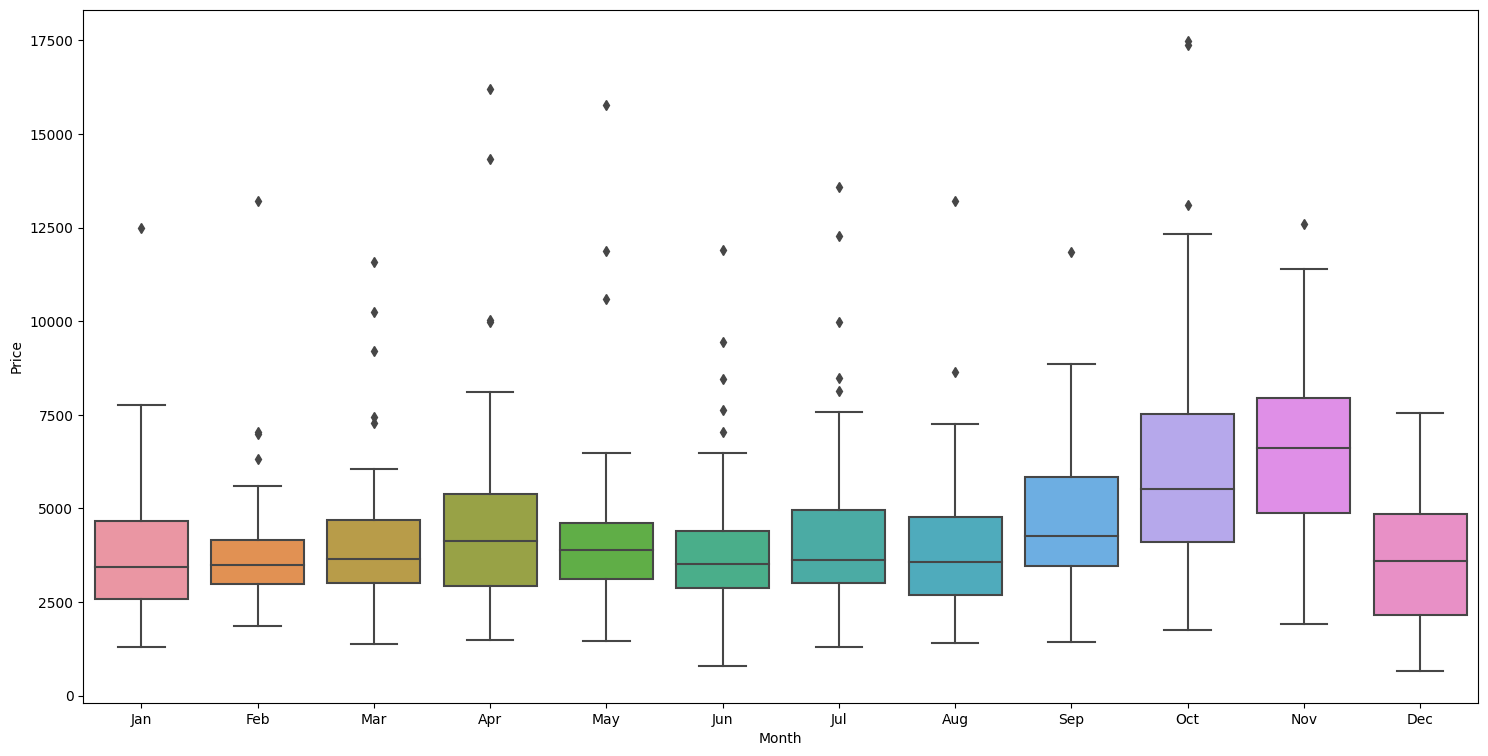

In [31]:
plt.figure(figsize=(18,9))
sns.boxplot(x='Month',y='Price',data=X)
plt.show()

<Axes: xlabel='Month', ylabel='Price'>

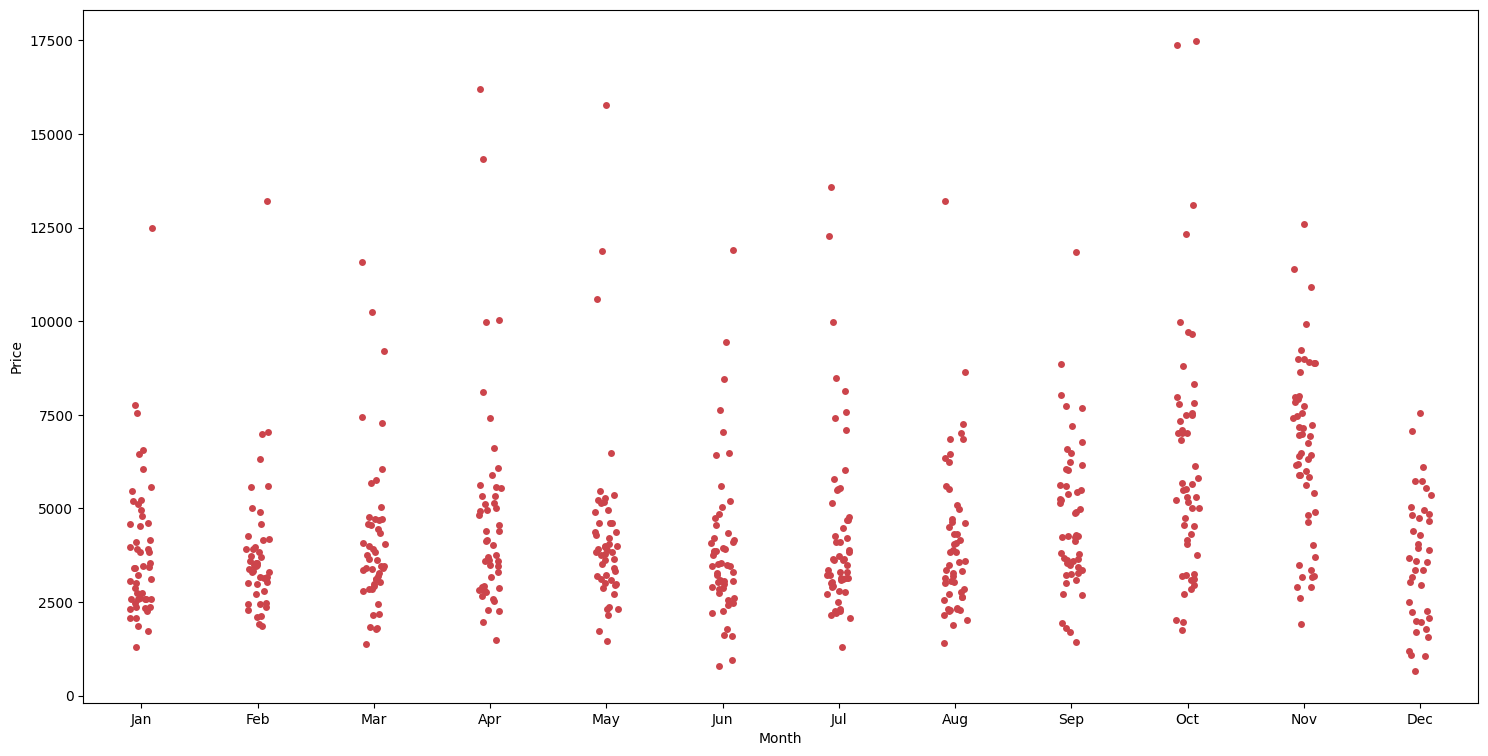

In [32]:
plt.figure(figsize=(18,9))
sns.stripplot(data=X,x='Month', y='Price',color='#cc444b')

In [33]:
# import pandas as pd
def check_stationarity(df, column):
    # Perform Augmented Dickey-Fuller test
    result = adfuller(df[column])

    # Extract test statistics and p-value
    test_statistic = result[0]
    p_value = result[1]

    # Set significance level
    significance_level = 0.05

    # Print the test statistics and p-value
    print("Augmented Dickey-Fuller Test Results:")
    print("------------------------------------")
    print(f"Test Statistic: {test_statistic}")
    print(f"P-value: {p_value}")
    print("------------------------------------")

    # Compare p-value with significance level
    if p_value < significance_level:
        print("Result: Series is stationary.")
    else:
        print("Result: Series is non-stationary.")

In [34]:
check_stationarity(cleaned_df, 'Price')

Augmented Dickey-Fuller Test Results:
------------------------------------
Test Statistic: -6.754515616919633
P-value: 2.8944786574636694e-09
------------------------------------
Result: Series is stationary.


<Figure size 2000x600 with 0 Axes>

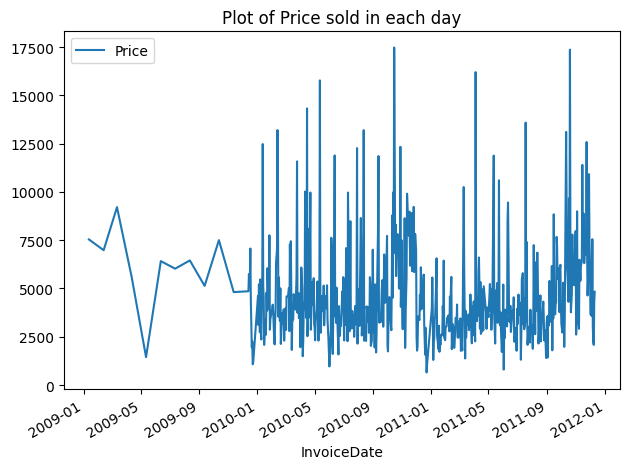

In [35]:
plt.figure(figsize=(20,6))
cleaned_df.plot()
plt.title("Plot of Price sold in each day")
plt.tight_layout()
plt.show()

In [36]:
X_train = cleaned_df.index.astype('int64').values.reshape(-1, 1)[:300]
y_train = cleaned_df['Price'][:300]
X_test =  cleaned_df.index.astype('int64').values.reshape(-1, 1)[300:]
y_test =  cleaned_df['Price'][300:]

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
regression_model = LinearRegression()

In [39]:
regression_model.fit(X_train,y_train)

LinearRegression()

In [40]:
regression_model.score(X_test,y_test)

-0.1845316996385835

In [41]:
predicted = pd.DataFrame()

In [42]:
predicted.index = np.arange(0,len(X_test))
predicted['Dates'] = cleaned_df.index[300:]
predicted['Actual'] = np.array(y_test)
predicted['predict'] = np.array(regression_model.predict(X_test))

In [43]:
predicted.head()

,Dates,Actual,predict
0,2010-12-11,5031.89,5159.229183
1,2010-12-12,3944.18,5160.863953
2,2010-12-13,4053.22,5162.498723
3,2010-12-14,4949.62,5164.133493
4,2010-12-15,4746.36,5165.768264


In [44]:
predicted.set_index('Dates',inplace=True)

In [45]:
import seaborn as sns

<Axes: xlabel='Dates', ylabel='Actual'>

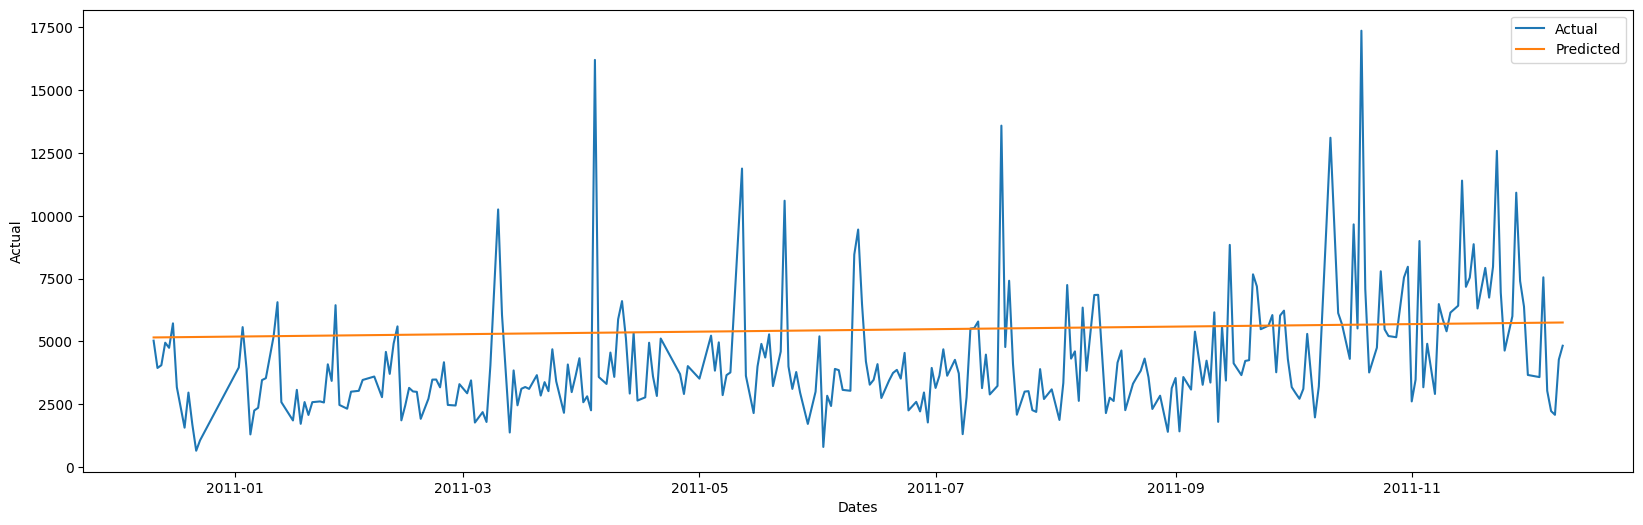

In [46]:
plt.figure(figsize=(20,6))
sns.lineplot(predicted['Actual'], label="Actual")
sns.lineplot(predicted['predict'], label="Predicted")

In [47]:
#import mse
from sklearn.metrics import mean_squared_error

In [48]:
mean_squared_error(y_test,regression_model.predict(X_test))

6627521.877355745

## Trying Timeseries models

<ipython-input-49-73bb80acec9a>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  plt.plot(cleaned_df['2009'])
<ipython-input-49-73bb80acec9a>:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  plt.plot(cleaned_df['2010'])
<ipython-input-49-73bb80acec9a>:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  plt.plot(cleaned_df['2011'])


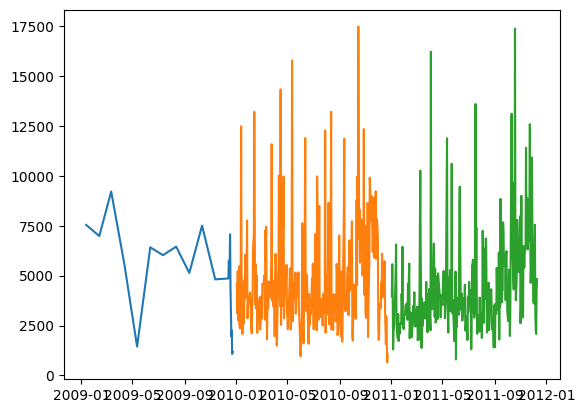

In [49]:
plt.plot(cleaned_df['2009'])
plt.plot(cleaned_df['2010'])
plt.plot(cleaned_df['2011'])

<ipython-input-50-9a9205514838>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  plt.plot(cleaned_df['05/2010'])
<ipython-input-50-9a9205514838>:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  plt.plot(cleaned_df['06/2010'])
<ipython-input-50-9a9205514838>:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  plt.plot(cleaned_df['07/2010'])


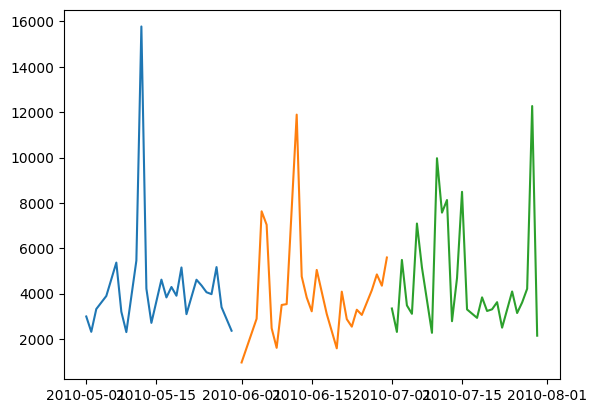

In [50]:
plt.plot(cleaned_df['05/2010'])
plt.plot(cleaned_df['06/2010'])
plt.plot(cleaned_df['07/2010'])

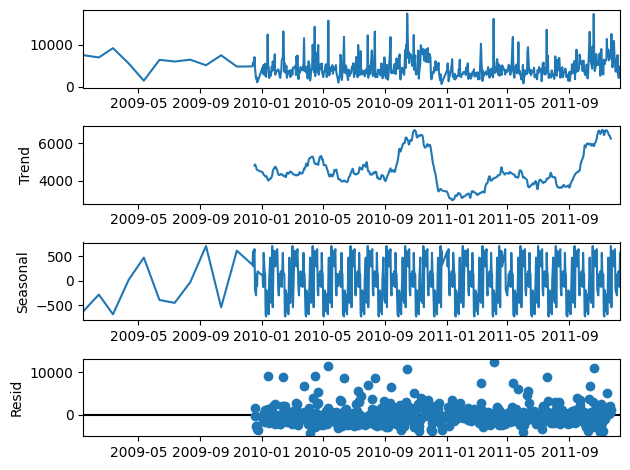

In [51]:
from statsmodels.tsa.seasonal import seasonal_decompose 
result = seasonal_decompose(cleaned_df, model='additive', period=30)
result.plot() 
plt.show()

In [52]:
np.unique(cleaned_df.index.year)

array([2009, 2010, 2011])

<ipython-input-53-13d4317c8593>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  plt.plot(cleaned_df['2009'])
<ipython-input-53-13d4317c8593>:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  plt.plot(cleaned_df['2010'])
<ipython-input-53-13d4317c8593>:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  plt.plot(cleaned_df['2011'])


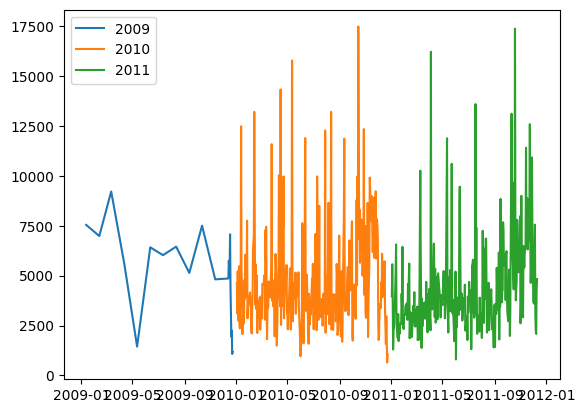

In [53]:
plt.plot(cleaned_df['2009'])
plt.plot(cleaned_df['2010'])
plt.plot(cleaned_df['2011'])
plt.legend(np.unique(cleaned_df.index.year))
plt.show()

In [54]:
check_stationarity(cleaned_df['2009'], 'Price')

Augmented Dickey-Fuller Test Results:
------------------------------------
Test Statistic: 0.38182372989753066
P-value: 0.9808023414054641
------------------------------------
Result: Series is non-stationary.


<ipython-input-54-19c01c9c99b4>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  check_stationarity(cleaned_df['2009'], 'Price')


In [55]:
check_stationarity(cleaned_df['2010'], 'Price')

Augmented Dickey-Fuller Test Results:
------------------------------------
Test Statistic: -9.381325697890448
P-value: 6.9445787195216e-16
------------------------------------
Result: Series is stationary.


<ipython-input-55-2a12be331c69>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  check_stationarity(cleaned_df['2010'], 'Price')


In [56]:
check_stationarity(cleaned_df['2011'], 'Price')

Augmented Dickey-Fuller Test Results:
------------------------------------
Test Statistic: -4.036490404270845
P-value: 0.0012310395098654554
------------------------------------
Result: Series is stationary.


<ipython-input-56-8533502b7253>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  check_stationarity(cleaned_df['2011'], 'Price')


### since 2009 data is not proper and different from other data, it is decided to remove that data

In [57]:
cleaned_df = cleaned_df[cleaned_df.index.year!=2009]

so we do the seasonal decompose again without 2009

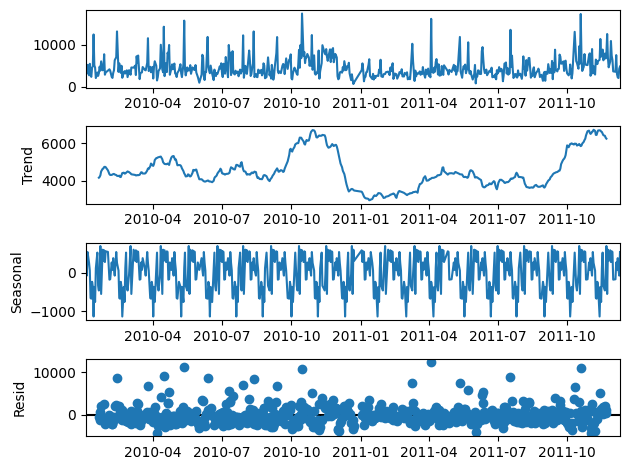

In [58]:
result = seasonal_decompose(cleaned_df, model='additive', period=30)
result.plot() 
plt.show()

now we can strong monthly seasonality but the data is stationary, so no differencing needed

# Rolling Mean

In [59]:
dfrollingmean = cleaned_df.rolling(window=7).mean()

In [60]:
rolled_weekly = cleaned_df.rolling(window=7).mean()
rolled_monthly = cleaned_df.rolling(window=30).mean()

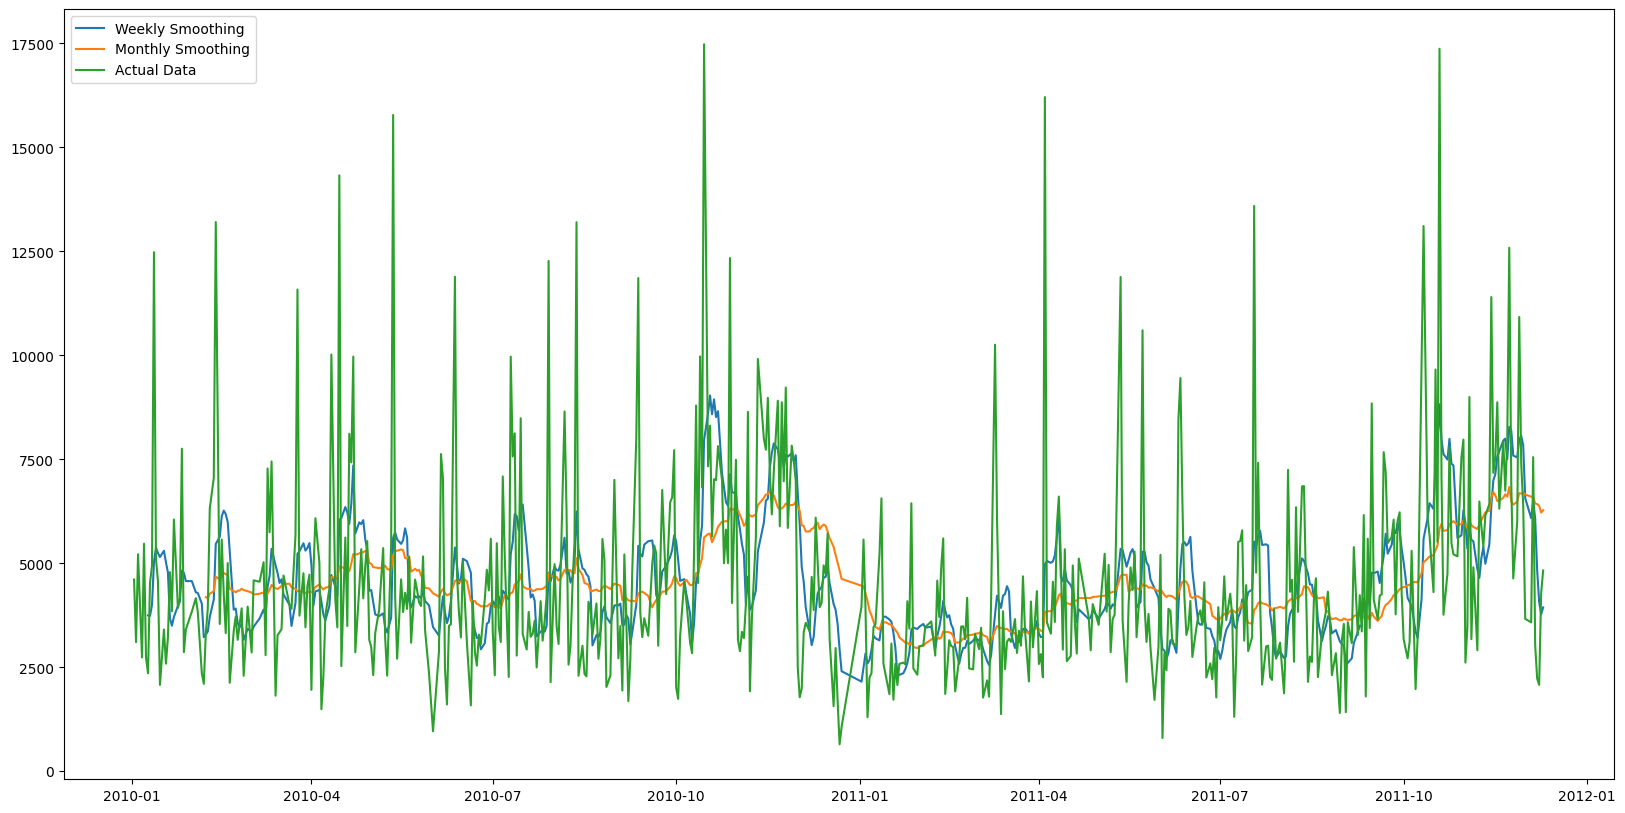

In [61]:
plt.figure(figsize=(20,10))
plt.plot(cleaned_df.rolling(window=7).mean(), label='Weekly Smoothing')
plt.plot(cleaned_df.rolling(window=30).mean(), label='Monthly Smoothing')
plt.plot(cleaned_df, label='Actual Data')
plt.legend()
plt.show()

In [62]:
from sklearn.metrics import mean_squared_error

# Calculate metrics
mse_weekly = mean_squared_error(cleaned_df.iloc[6:], rolled_weekly.dropna(), squared=True)
mse_monthly = mean_squared_error(cleaned_df[29:], rolled_monthly.dropna(), squared=True)

# Print metrics
print("MSE (Weekly Smoothing):", mse_weekly)
print("MSE (Monthly Smoothing):", mse_monthly)

MSE (Weekly Smoothing): 4455380.063041111
MSE (Monthly Smoothing): 5369107.74576271


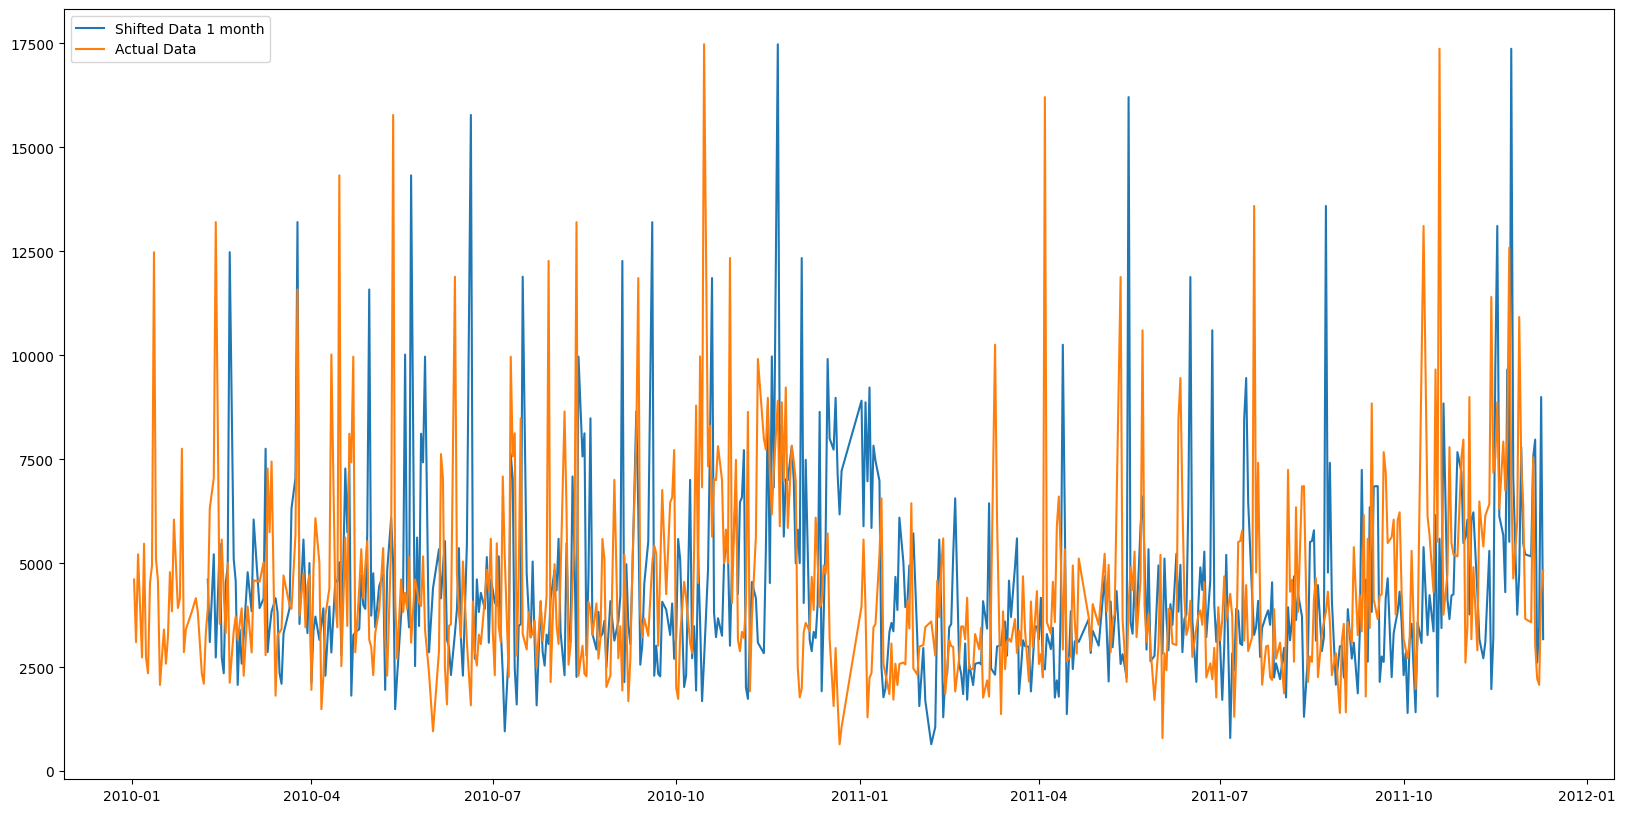

In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.plot(cleaned_df.shift(30), label='Shifted Data 1 month')
plt.plot(cleaned_df, label='Actual Data')
plt.legend()
plt.show()

In [64]:
shifted_data = cleaned_df.shift(30)
# Calculate metrics
mse_shifted = mean_squared_error(cleaned_df[30:], shifted_data.dropna(), squared=True)

# Print metrics
print("MSE (Shifted Data 1 month):", mse_shifted)

MSE (Shifted Data 1 month): 11634850.703235338


In [65]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

[]

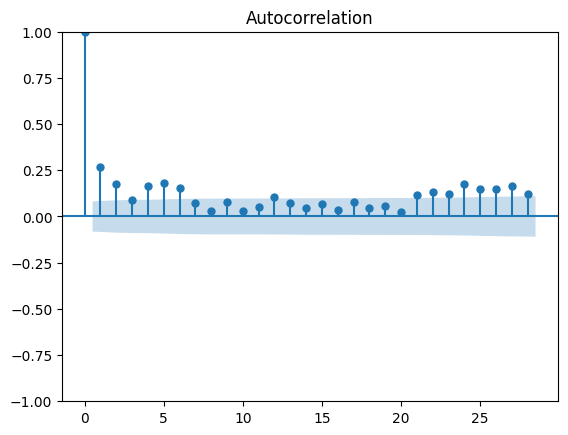

In [66]:
plot_acf(cleaned_df)
plt.plot()

## from above acf plot we can infer that d value is 3

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


[]

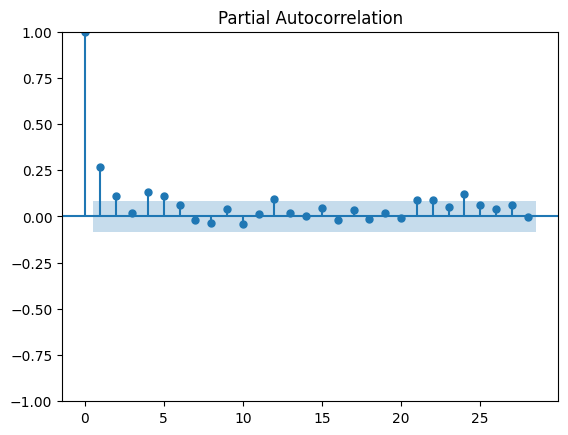

In [67]:
plot_pacf(cleaned_df)
plt.plot()

## from above pacf plot we can infer p value is 2

We take the first 300 datas as train data

In [68]:
train = cleaned_df['Price'][:300]
test = cleaned_df['Price'][300:]

In [69]:
len(test)

273

# ARIMA

In [70]:
from statsmodels.tsa.arima.model import ARIMA

In [71]:
model = ARIMA(train, order=(2,0,3))
model_fit = model.fit()
print(model_fit.summary())
# X_train
# y_train
# X_test 
# y_test 

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  300
Model:                 ARIMA(2, 0, 3)   Log Likelihood               -2766.382
Date:                Sun, 04 Jun 2023   AIC                           5546.765
Time:                        09:09:01   BIC                           5572.691
Sample:                             0   HQIC                          5557.141
                                - 300                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4731.2461    366.886     12.896      0.000    4012.164    5450.329
ar.L1          0.3793      0.586      0.647      0.518      -0.770       1.529
ar.L2          0.4606      0.428      1.076      0.2

In [72]:
result=model_fit.forecast(273)
result.index = test.index

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


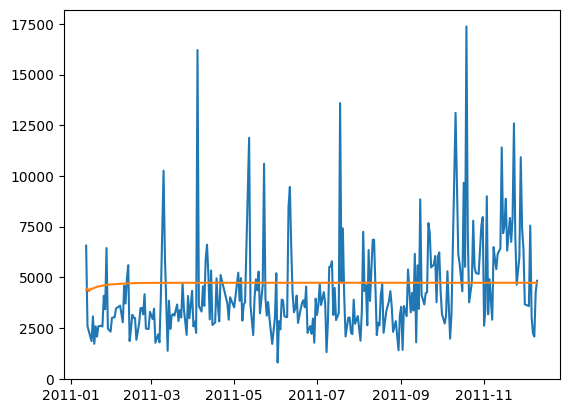

In [73]:
plt.plot(test)
plt.plot(result)
plt.show()

In [74]:
mse_arima = mean_squared_error(test, result, squared=True)
print("The mean squared error calue of arima is ",mse_arima)

The mean squared error calue of arima is  5840557.178655849


In [75]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [76]:
from pmdarima.arima import auto_arima

In [77]:
auto_model=auto_arima(train,d=0,start_q=0,start_p=0,max_p=3,max_q=3,D=1,start_P=0,start_Q=0,max_P=1,max_Q=1,seasonal=True,
                   trace=True,stepwise=True,m=1)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=5558.722, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=5545.584, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=5549.080, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=6006.374, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=5543.924, Time=0.04 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=5545.660, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=5545.863, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=5546.458, Time=0.06 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=5547.655, Time=0.14 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=5614.473, Time=0.03 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.535 seconds


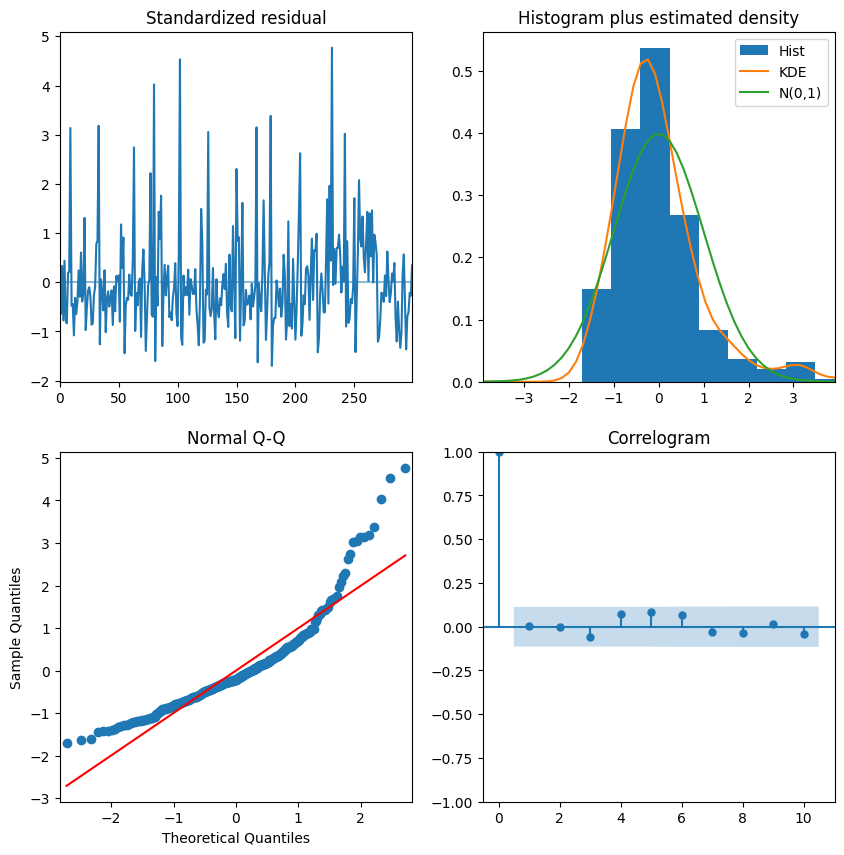

In [78]:
auto_model.plot_diagnostics(figsize=(10,10))
plt.show()

## final inference
the data use is stationary and seasonal data (monthly seasonality is found)
Arima was better than linear regression bbt still failed to provide good forecast. This can be further developed by using LSTM